To get access to neutral_atom_imaging_simulation:

pip install pip_project/dist/neutral_atom_imaging_simulation-0.0.1-py3-none-any.whl

In [1]:
from neutral_atom_imaging_simulation import Camera, Experiment, ImageGenerator
import matplotlib.pyplot as plt
import numpy as np
import bisect
import ctypes
import random
from skimage.restoration import richardson_lucy
from shapely.geometry import LineString

In [2]:
generator = ImageGenerator.ImageGenerator()
generator.read_config_file("simulationSettings.cfg")

# configuring camera
camera = Camera.CMOSCamera(resolution=(512,512), binning=1, physical_pixel_size=4.6, magnification=31.25)
generator.set_camera(camera)
 
# configuring experiment
experiment = Experiment.TweezerArray()
experiment.configure_atom_sites_camera_space((20/512,20/512),(20,19),(50/512,55/512),(0,0))  # configures atom locations in physical coordinates
generator.set_experiment(experiment)

[1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.

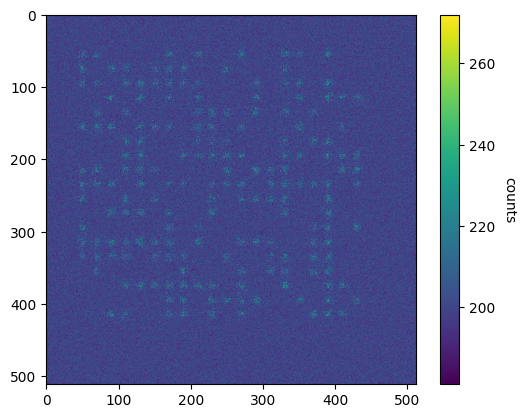

In [3]:

image, truth = generator.create_image()

plt.imshow(image)
cb = plt.colorbar()
cb.set_label('counts', rotation=270, labelpad=15)

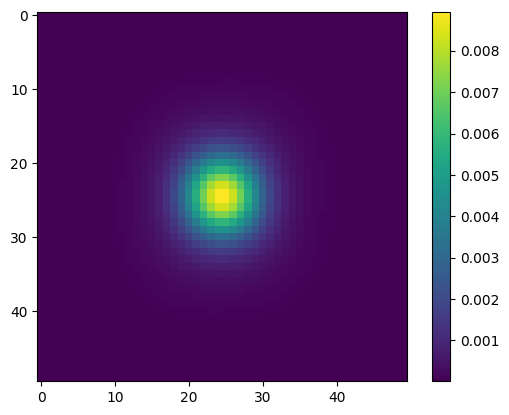

In [4]:
psf = np.zeros((50,50),np.float64)
camera.apply_settings()
generator.get_library().getConvolutedLightSource(psf.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), ctypes.c_int(50))
plt.imshow(psf)
plt.colorbar()